In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_squared_error,
                             mean_absolute_percentage_error)
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = pd.read_csv("../../Data/Fangyou_data/Cleaned/combined_non_filled_preprocessed.csv")

In [3]:
fluxes = data.drop(columns=["Source_Name", "Total_flux", "Peak_flux", "S_Code", 
                            "EBV", "Z_BEST", "Mass_median", "Mass_l68", 
                            "Mass_u68", "AGN_final", "RadioAGN_final", 
                            "Classification", "Radio_excess", "AGNfrac_af", 
                            "AGNfrac_af_16", "AGNfrac_cg_s_16", "Source"])

In [4]:
fluxes.isna().sum()

FUV_flux_corr          31308
NUV_flux_corr          19450
u_flux_corr             7724
Bw_flux_corr           60465
R_flux_corr            60236
I_flux_corr            59933
z_flux_corr             6960
z_Subaru_flux_corr     61272
y_flux_corr            32610
J_flux_corr            10216
H_flux_corr            60312
K_flux_corr            14495
Ks_flux_corr           60365
ch1_flux_corr          59881
ch2_flux_corr          59880
ch3_flux_corr          59984
ch4_flux_corr          59990
F_MIPS_24               1342
F_PACS_100               827
F_PACS_160               827
F_SPIRE_250              554
F_SPIRE_350              554
F_SPIRE_500              554
g_flux_corr            20263
r_flux_corr            19476
i_flux_corr            47802
g_hsc_flux_corr        49458
r_hsc_flux_corr        49390
i_hsc_flux_corr        49274
z_hsc_flux_corr        49381
y_hsc_flux_corr        49779
nb921_hsc_flux_corr    49514
ch1_swire_flux_corr    18403
ch2_swire_flux_corr    17765
ch3_swire_flux

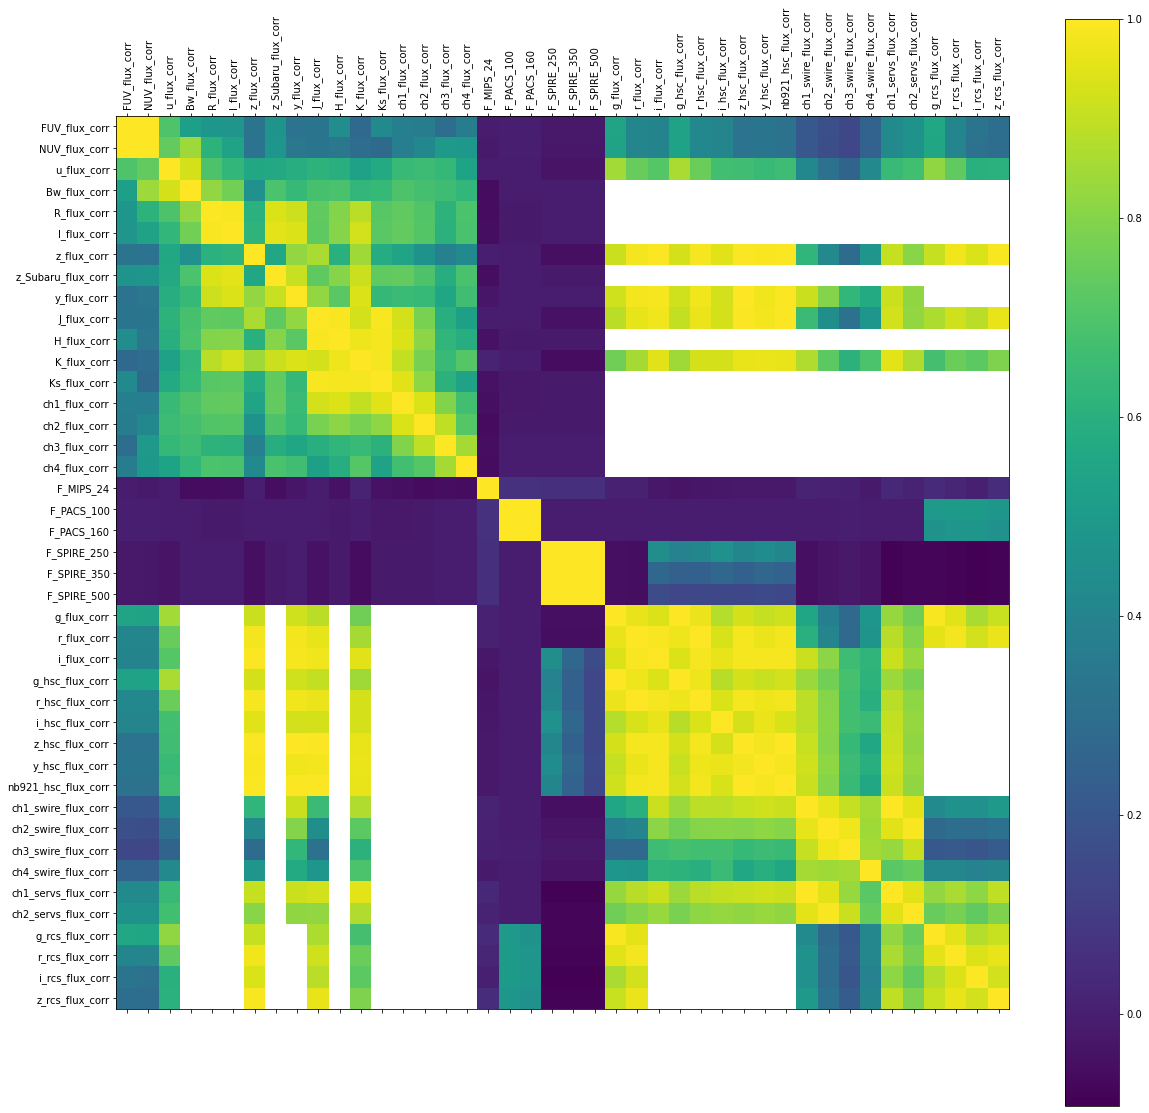

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))
corr = fluxes.corr()
corr_plot = ax.matshow(corr)
plt.colorbar(corr_plot)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [71]:
corr["Bw_flux_corr"].sort_values(ascending=False)

Bw_flux_corr           1.000000
u_flux_corr            0.929426
NUV_flux_corr          0.839083
R_flux_corr            0.821411
I_flux_corr            0.767713
ch1_flux_corr          0.693697
z_Subaru_flux_corr     0.689799
H_flux_corr            0.684810
J_flux_corr            0.680839
ch2_flux_corr          0.677435
ch3_flux_corr          0.658828
y_flux_corr            0.640755
Ks_flux_corr           0.640676
ch4_flux_corr          0.630857
K_flux_corr            0.629539
FUV_flux_corr          0.524596
z_flux_corr            0.461965
F_SPIRE_250           -0.006708
F_SPIRE_350           -0.006708
F_SPIRE_500           -0.006708
F_PACS_160            -0.008017
F_PACS_100            -0.008017
F_MIPS_24             -0.057785
g_flux_corr                 NaN
r_flux_corr                 NaN
i_flux_corr                 NaN
g_hsc_flux_corr             NaN
r_hsc_flux_corr             NaN
i_hsc_flux_corr             NaN
z_hsc_flux_corr             NaN
y_hsc_flux_corr             NaN
nb921_hs

In [6]:
fluxes.columns

Index(['FUV_flux_corr', 'NUV_flux_corr', 'u_flux_corr', 'Bw_flux_corr',
       'R_flux_corr', 'I_flux_corr', 'z_flux_corr', 'z_Subaru_flux_corr',
       'y_flux_corr', 'J_flux_corr', 'H_flux_corr', 'K_flux_corr',
       'Ks_flux_corr', 'ch1_flux_corr', 'ch2_flux_corr', 'ch3_flux_corr',
       'ch4_flux_corr', 'F_MIPS_24', 'F_PACS_100', 'F_PACS_160', 'F_SPIRE_250',
       'F_SPIRE_350', 'F_SPIRE_500', 'g_flux_corr', 'r_flux_corr',
       'i_flux_corr', 'g_hsc_flux_corr', 'r_hsc_flux_corr', 'i_hsc_flux_corr',
       'z_hsc_flux_corr', 'y_hsc_flux_corr', 'nb921_hsc_flux_corr',
       'ch1_swire_flux_corr', 'ch2_swire_flux_corr', 'ch3_swire_flux_corr',
       'ch4_swire_flux_corr', 'ch1_servs_flux_corr', 'ch2_servs_flux_corr',
       'g_rcs_flux_corr', 'r_rcs_flux_corr', 'i_rcs_flux_corr',
       'z_rcs_flux_corr'],
      dtype='object')

In [7]:
def evaluate_model(model, test_features, test_labels):
    """Return the metrics of the predictions"""
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = mean_absolute_percentage_error(test_labels, predictions)
    rmse = mean_squared_error(test_labels, predictions, squared=False)
    r2_score = model.score(test_features, test_labels)
    print('Model Performance %s' % model)
    print('Average Error: {:0.5f}'.format(np.mean(errors)))
    print('RMSE = {:0.5f}'.format(rmse))
    print('MAPE = {:0.5f}%'.format(mape*100))
    print('R^2 = {:0.5f}'.format(r2_score))

In [48]:
dat = fluxes[["FUV_flux_corr", "NUV_flux_corr"]].dropna()
X = dat["NUV_flux_corr"]
y = dat["FUV_flux_corr"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)

reg = LinearRegression().fit(X_train, y_train)
evaluate_model(reg, X_test, y_test)

Model Performance LinearRegression()
Average Error: 0.03714
RMSE = 0.16125
MAPE = 50.85805%
R^2 = 0.99891


In [64]:
dat = fluxes[["r_hsc_flux_corr", "g_flux_corr"]].dropna()
X = dat["r_hsc_flux_corr"]
y = dat["g_flux_corr"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)

reg = LinearRegression().fit(X_train, y_train)
evaluate_model(reg, X_test, y_test)
print(reg.coef_, reg.intercept_)

Model Performance LinearRegression()
Average Error: 1.62553
RMSE = 4.67187
MAPE = 195.98791%
R^2 = 0.94910
[0.46913531] -0.4075087825189696


In [66]:
dat = fluxes[["r_hsc_flux_corr", "g_hsc_flux_corr"]].dropna()
X = dat["r_hsc_flux_corr"]
y = dat["g_hsc_flux_corr"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)

reg = LinearRegression().fit(X_train, y_train)
evaluate_model(reg, X_test, y_test)
print(reg.coef_, reg.intercept_)

Model Performance LinearRegression()
Average Error: 1.67103
RMSE = 5.55053
MAPE = 98.71049%
R^2 = 0.95081
[0.48875252] -0.2372621352858113


Model Performance LinearRegression()
Average Error: 0.03714
RMSE = 0.16125
MAPE = 50.85805%
R^2 = 0.99891


In [12]:
reg.coef_, reg.intercept_

(array([1.5531972]), 0.013755518325643479)

In [39]:
dat = fluxes[["z_Subaru_flux_corr", "z_flux_corr"]].dropna()
z_sub = dat["z_Subaru_flux_corr"]
z = dat["z_flux_corr"]

X_train, X_test, y_train, y_test = train_test_split(z, z_sub, test_size=0.2, random_state=42)

X_train = X_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

evaluate_model(reg, X_test, y_test)

Model Performance LinearRegression()
Average Error: 25.67615
RMSE = 52.52109
MAPE = 44602575.63505%
R^2 = 0.35557


In [46]:
sum(np.abs(z-z_sub)>5)

1558

In [47]:
corr

,FUV_flux_corr,NUV_flux_corr,u_flux_corr,Bw_flux_corr,R_flux_corr,I_flux_corr,z_flux_corr,z_Subaru_flux_corr,y_flux_corr,J_flux_corr,...,ch1_swire_flux_corr,ch2_swire_flux_corr,ch3_swire_flux_corr,ch4_swire_flux_corr,ch1_servs_flux_corr,ch2_servs_flux_corr,g_rcs_flux_corr,r_rcs_flux_corr,i_rcs_flux_corr,z_rcs_flux_corr
FUV_flux_corr,1.000000,0.999212,0.700935,0.524596,0.481551,0.478581,0.325999,0.471479,0.325249,0.333108,...,0.207858,0.172924,0.144606,0.253711,0.431799,0.463118,0.556503,0.410078,0.326510,0.303459
NUV_flux_corr,0.999212,1.000000,0.736146,0.839083,0.613601,0.536697,0.325448,0.480421,0.341902,0.334170,...,0.204079,0.169900,0.141939,0.249227,0.430866,0.462690,0.549555,0.403496,0.320722,0.297575
u_flux_corr,0.700935,0.736146,1.000000,0.929426,0.693090,0.629688,0.557284,0.565046,0.586947,0.614292,...,0.418188,0.320892,0.260694,0.422163,0.643900,0.671060,0.818137,0.732686,0.601706,0.605287
Bw_flux_corr,0.524596,0.839083,0.929426,1.000000,0.821411,0.767713,0.461965,0.689799,0.640755,0.680839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R_flux_corr,0.481551,0.613601,0.693090,0.821411,1.000000,0.988448,0.603357,0.940531,0.916460,0.735385,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I_flux_corr,0.478581,0.536697,0.629688,0.767713,0.988448,1.000000,0.617227,0.954944,0.940603,0.729819,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
z_flux_corr,0.325999,0.325448,0.557284,0.461965,0.603357,0.617227,1.000000,0.563708,0.821125,0.860838,...,0.625099,0.421547,0.291785,0.478408,0.904295,0.807330,0.904582,0.976625,0.940124,0.988586
z_Subaru_flux_corr,0.471479,0.480421,0.565046,0.689799,0.940531,0.954944,0.563708,1.000000,0.908125,0.729596,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
y_flux_corr,0.325249,0.341902,0.586947,0.640755,0.916460,0.940603,0.821125,0.908125,1.000000,0.824141,...,0.912601,0.796751,0.632615,0.575589,0.913005,0.820320,NaN,NaN,NaN,NaN
J_flux_corr,0.333108,0.334170,0.614292,0.680839,0.735385,0.729819,0.860838,0.729596,0.824141,1.000000,...,0.652374,0.449265,0.317677,0.481280,0.924184,0.822489,0.864352,0.922229,0.887954,0.962245
